# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv') # dont need a matrix of features for reinforcement learning (as we dont need to predict anything)

## Implementing UCB

In [3]:
import math

user_count = dataset.shape[0]
advert_count = dataset.shape[1]

ads_selected = []
numbers_of_selections = [0] * advert_count # List of 10 zeros (one for each advert)
sums_of_rewards = [0] * advert_count  # List of 10 zeros (one for each advert)

total_reward = 0

for user in range(0, user_count):
    ad = 0
    max_upper_bound = 0

    for advert in range(0, advert_count):
        if (numbers_of_selections[advert] > 0): # if advert has been selected before
            average_reward = sums_of_rewards[advert] / numbers_of_selections[advert] # average reward for advert
            delta_advert = math.sqrt(3/2 * math.log(user + 1) / numbers_of_selections[advert]) # confidence interval (remember index starts at 0)
            upper_bound = average_reward + delta_advert
        else:
            upper_bound = 1e400 # set to a very large number
        if (upper_bound > max_upper_bound): # select advert with highest upper bound
            max_upper_bound = upper_bound
            ad = advert
    
    ads_selected.append(ad) # append selected advert to list
    # update values
    numbers_of_selections[ad] += 1 # increment number of selections for advert
    reward = dataset.values[user, ad] # get reward for advert
    sums_of_rewards[ad] += reward # add reward to total reward for advert
    total_reward += reward # add reward to total reward

## Visualising the results

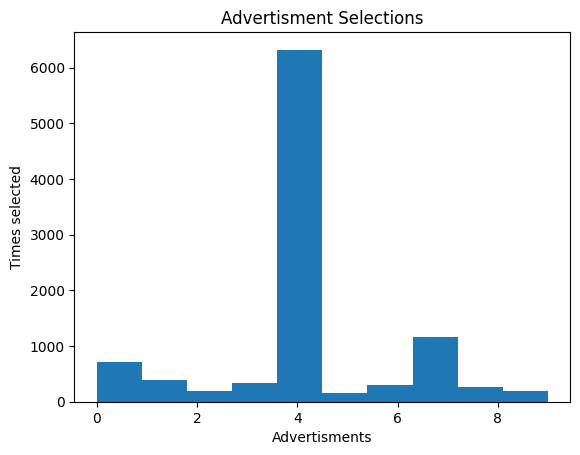

In [4]:
plt.hist(ads_selected)
plt.title('Advertisment Selections')
plt.xlabel('Advertisments')
plt.ylabel('Times selected')
plt.show()